In [2]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import pdist, squareform
from scipy.stats import spearmanr

plt.style.use("jupyter")

In [3]:
dm = pd.read_csv("../data/iza_dm.csv", index_col=0)
synth = pd.read_csv("../data/Muraoka2019-extracted.csv", index_col=0)
feat = pd.read_csv("../data/zeo-features.csv", index_col=0)

In [4]:
cbu_cols = [col for col in feat.columns if col.startswith("cbu_")]

In [5]:
def get_distance_matrix(df):
    return pd.DataFrame(
        squareform(pdist(df.values.reshape(-1, len(df.columns)))),
        columns=df.index,
        index=df.index,
    )

def get_distances(dm):
    i, j = np.triu_indices_from(dm.values, k=1)
    return dm.values[i, j]

In [6]:
feat_dist = get_distances(get_distance_matrix(feat[cbu_cols]))

## Do distances strongly correlate with density?

In [7]:
i, j = np.triu_indices_from(dm.values, k=1)
distances = dm.values[i, j]

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


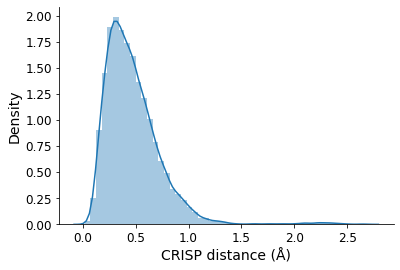

In [10]:
fig, ax = plt.subplots()

sns.distplot(distances, ax=ax)

ax.set_xlabel("CRISP distance (Å)")
ax.set_ylabel("Density")

plt.show()

In [138]:
pairs = dm.reset_index().melt(id_vars="index").rename(columns={"index": "z1", "variable": "z2"})

In [139]:
pairs.loc[pairs.z1 == "CHA"].sort_values("value")

,z1,z2,value
12240,CHA,CHA,0.000000
556,CHA,AEI,0.055589
3096,CHA,AFT,0.079879
49578,CHA,SAV,0.105227
3604,CHA,AFX,0.124920
...,...,...,...
37132,CHA,MTF,1.027601
12494,CHA,CHI,1.052248
8176,CHA,BCT,1.052829
13764,CHA,CZP,1.054802


In [14]:
density_dm = pd.DataFrame(
    squareform(pdist(feat['density'].values.reshape(-1, 1))),
    columns=feat.index,
    index=feat.index,
)

In [15]:
zeos = sorted(list(set(dm.index) & set(density_dm.index)))

In [16]:
crisp_dist = dm.loc[zeos, zeos]
density_dist = density_dm.loc[zeos, zeos]

i, j = np.triu_indices_from(crisp_dist.values, k=1)
crisp_dist = crisp_dist.values[i, j]
density_dist = density_dist.values[i, j]

In [17]:
np.corrcoef(crisp_dist, density_dist)

array([[1.        , 0.72062514],
       [0.72062514, 1.        ]])

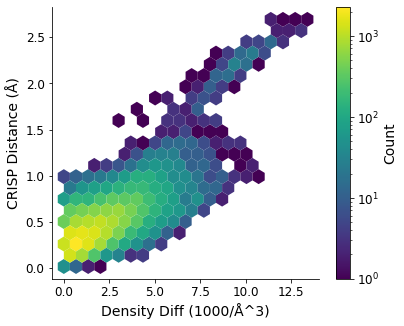

In [18]:
fig, ax = plt.subplots(figsize=(6, 5))

hb = ax.hexbin(
    density_dist,
    crisp_dist,
    gridsize=20,
    mincnt=1,
    linewidths=(0,),
    bins='log'
)

cbar = fig.colorbar(hb)
cbar.set_label("Count")

ax.set_xlabel("Density Diff (1000/Å^3)")
ax.set_ylabel("CRISP Distance (Å)")

plt.show()

## What are the closest distances?

In [216]:
pairs = (dm
    .reset_index()
    .melt(id_vars="index")
    .rename(columns={"index": "z1", "variable": "z2"})
)

pairs = pairs.loc[pairs.z1 < pairs.z2]

In [220]:
pairs.sort_values("value").iloc[:50]

,z1,z2,value
50744,SBS,SBT,0.018909
26263,ITH,ITR,0.019407
28040,ITG,IWW,0.020812
7130,ANO,AVE,0.025219
9917,AFS,BPH,0.036629
52334,AFR,SFO,0.040428
19876,EMT,FAU,0.040781
55573,SFE,SSY,0.041957
42569,MWF,PAU,0.042635
57725,ERI,SWY,0.043054


In [226]:
pairs.loc[(pairs.z1 == 'CHA') | (pairs.z2 == 'CHA')].sort_values("value")

,z1,z2,value
12194,AEI,CHA,0.055589
12204,AFT,CHA,0.079879
49578,CHA,SAV,0.105227
12206,AFX,CHA,0.124920
52880,CHA,SFW,0.149854
...,...,...,...
37132,CHA,MTF,1.027601
12494,CHA,CHI,1.052248
12224,BCT,CHA,1.052829
13764,CHA,CZP,1.054802


## Do distances correlate with other synthesis parameters?

In [11]:
def get_synthesis_distance_matrix(cols):
    reduced = synth[cols].dropna()
    normalized = (reduced - reduced.median(0)) / reduced.std(0)

    return get_distance_matrix(normalized)

    i, j = np.triu_indices_from(synth_dm.values, k=1)
    synth_dist = synth_dm.values[i, j]
    crisp_dist = reduced_dm.values[i, j]
    
    return synth_dist, crisp_dist

In [19]:
columns = ["Si", "Na", "H2O", "temperature", "time"]

results = []
for cols_bool in itertools.product([True, False], repeat=len(columns)):
    
    if not any(cols_bool):
        continue

    cols = [c for c, addc in zip(columns, cols_bool) if addc]
    
    synth_dist, crisp_dist = get_distances(cols, distances=density_dm)
    
    results.append({
        **dict(zip(columns, cols_bool)),
        "corr": spearmanr(synth_dist, crisp_dist).correlation,
    })

resdf = pd.DataFrame(results)

TypeError: get_distances() got an unexpected keyword argument 'distances'

In [ ]:
resdf.sort_values('corr')

In [28]:
dsyn = get_synthesis_distance_matrix(["temperature"])
idx = sorted(list(set(dsyn.index) & set(dm.index)))
dcsp = dm.loc[idx, idx]

dsyn = get_distances(dsyn)
dcsp = get_distances(dcsp)

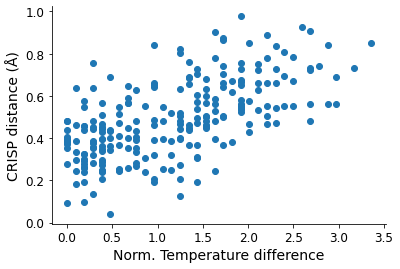

In [31]:
fig, ax = plt.subplots()

ax.scatter(dsyn, dcsp)

ax.set_xlabel("Norm. Temperature difference")
ax.set_ylabel("CRISP distance (Å)")

plt.show()

In [32]:
np.corrcoef(dsyn, dcsp)

array([[1.        , 0.61436935],
       [0.61436935, 1.        ]])

In [188]:
synth[columns].dropna().sort_values('temperature')

,Si,Na,H2O,temperature,time
phase,,,,,
FAU,0.71,5.70,140.0,25,354.0
EMT,0.88,1.60,11.0,50,45.0
SOD,0.40,8.00,44.0,60,52.0
LTA,0.50,1.50,26.0,65,168.0
GIS,0.70,1.30,22.0,100,168.0
PHI,0.91,0.63,14.0,100,68.0
RHO,0.83,0.45,8.1,100,72.0
ERI,0.93,0.49,13.0,120,168.0
ANA,0.80,0.60,22.0,165,24.0


In [219]:
synth

,Si,Na,K,Cs,H2O,temperature,time,Reference
phase,,,,,,,,
ANA,0.80,0.60,NaN,NaN,22.0,165,24.0,"Ing. Eng. Chem. Prod. Res. Dev. 17, 223-227 (1..."
BPH,0.14,NaN,4.60,NaN,137.0,90,168.0,"Zeolites 11, 116-123 (1991)"
CAN,0.52,1.40,NaN,NaN,25.0,180,504.0,"Catal. Sci. Technol. 4, 3762-3771 (2014)"
CHA,0.75,NaN,0.62,NaN,34.0,80,96.0,"J. Chem. Soc., Dalton Trans. 1259-1265 (1972)"
EDI,0.50,NaN,NaN,NaN,68.0,80,24.0,"J. Eur. Ceram. Soc. 26, 455-458 (2006)"
EMT,0.88,1.60,NaN,NaN,11.0,50,45.0,"Nat. Mater. 14, 447-451 (2015)"
ERI,0.93,0.49,0.16,NaN,13.0,120,168.0,"Powder Technol. 206, 345-352 (2011)"
FAU,0.71,5.70,NaN,NaN,140.0,25,354.0,"J. Phys. Chem. B 108, 15587-15598 (2004)"
FER,0.91,0.23,NaN,NaN,32.0,175,144.0,"Top. Catal. 52, 67-74 (2009)"
